In [3]:
%matplotlib inline
%config InlineBacked.format="retina"
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim

In [6]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.MNIST("~/pytorch/MNIST", download = True, transform = transform, train = True )
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


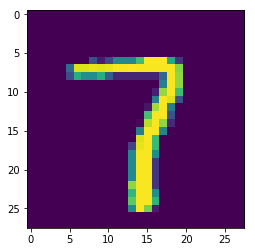

In [9]:
plt.imshow(images[1].numpy().squeeze())

In [27]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,32),
                     nn.ReLU(),
                     nn.Linear(32,10),
                     nn.LogSoftmax(dim=1))

In [28]:
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): LogSoftmax()
)

In [32]:
criterion = nn.NLLLoss()
Optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [33]:
epoches = 7
for e in range(epoches):
    running_loss = 0
    for images , labels in trainloader:
        images = images.view(images.shape[0],-1)
        Optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        Optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")

Training loss : 0.03129428922772598
Training loss : 0.025042829097810585
Training loss : 0.022858661105002422
Training loss : 0.021492530490512023
Training loss : 0.02042868100543584
Training loss : 0.019635637616440813
Training loss : 0.01893652545641671


In [34]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


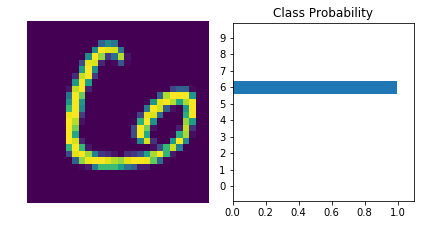

In [51]:
img = images[15].view(1,784)
with torch.no_grad():
    logps = model(img)
    ps = torch.exp(logps)
    view_classify(img.view(1,28,28),ps)